In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
def hypothesis(w,X,b):
    y_hat = np.dot(w, X) + b
    return y_hat
def cost(y, y_hat):
    
    # Calculating cost function.
    m = y.shape[0]
    loss = (1/(2*m))*np.sum(np.square(y_hat-y))
    return loss

# Calulating gradient descent w.r.t. parameters(weights and bias).
def gradient_descent(X, y, y_hat):
    

    # m-> number of training examples.
    m = X.shape[0]

    # Gradient of loss w.r.t weights.
    dw = (1 / m) * np.dot(X.T, (y_hat - y))
    # dw = np.dot(X.T, (1/m)*(y_hat - y))

    # Gradient of loss w.r.t bias.
    db = (1 / m) * np.sum((y_hat - y))
    # db = np.sum((1 / m) *(y_hat - y))

    return dw, db

def x_transform(X, degrees):
    
    t = X.copy()
    # Appending columns of higher degrees to X.
    for i in degrees:
        X = np.append(X, t ** i, axis=1)
        
        

    return X

def train(X, y,  degrees, epochs, lr):
    

    # Adding features to input X.
    x = x_transform(X, degrees)
    # print(x.shape)
    # print(x)

    # m-> number of training examples
    # n-> number of features
    m = x.shape[0]
    n = x.shape[1]

    # Initializing weights and bias to zeros.
    w = np.zeros((n, 1))
    b = 0

    # Reshaping y.
    y = y.reshape(m, 1)

    # Empty list to store losses.
    losses = []

    # Training loop.
    for epoch in range(0 , epochs):
        

            # Calculating hypothesis
            y_hat = hypothesis(x, w, b)

            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradient_descent(x, y, y_hat)

            # Updating the parameters.

            w = w - lr * dw
            b = b - lr * db


        # Calculating loss and appending it in the list.
            l = cost(y, y_hat)
            losses.append(l)

    # returning weights, bias and losses(List).
    return w, b, losses


# Predicting function.
def predict(X, w, b, degrees):
    

   

    # Adding degrees to input X.
    x1 = x_transform(X, degrees)

    # Returning predictions.
    return np.dot(x1, w) + b



df = pd.read_csv("../input/polynomial/Polynomial_train.csv")
df1 = pd.read_csv("../input/polynomial/Polynomial_test.csv")
df.drop(df.columns[0], axis=1, inplace= True)
df1.drop(df1.columns[0], axis=1, inplace= True)
y1 = df1["label"]
y = df["label"]

y_train = y.values.reshape(50000,1)
y_test = y1.values.reshape(10000, 1)
df1.drop(df1.columns[3], axis=1, inplace= True)
df.drop(df.columns[3], axis=1, inplace= True)
df["XY"] = df["X"]*df["Y"]
df["YZ"] = df["Y"]*df["Z"]
df["ZX"] = df["Z"]*df["X"]
df1["XY"] = df1["X"]*df1["Y"]
df1["YZ"] = df1["Y"]*df1["Z"]
df1["ZX"] = df1["Z"]*df1["X"]


# X = (df - df.mean())/(df.max() - df.min())
X = (df - df.mean())/(df.std())
x_test = (df1 - df1.mean())/(df1.std())
# x_test = (df1 - df1.mean())/(df1.max() - df1.min())
print(x_test.columns)
print(x_test.head())

# print(X.shape)
print(X.head())
X.values.reshape(50000,6)
x_test.values.reshape(10000,6)


# print(y_train.shape)
train_data = X



w, b, l = train(train_data, y_train,  degrees=[2], epochs=10000,
                lr=0.01)


# print(y_train.shape)



Index(['X', 'Y', 'Z', 'XY', 'YZ', 'ZX'], dtype='object')
          X         Y         Z        XY        YZ        ZX
0  1.602895  0.057199  1.034578  0.136193  0.070325  1.663779
1  0.474656  1.049657  1.109700  0.539850  1.179462  0.537206
2 -0.475360  1.332401 -1.198596 -0.603881 -1.621266  0.550819
3 -1.224451 -1.608887  0.147274  1.956122 -0.239396 -0.179585
4  0.260161 -0.397724  1.042264 -0.084404 -0.404320  0.281710
          X         Y         Z        XY        YZ        ZX
0  0.105753 -1.697386 -1.010452 -0.179520  1.714817 -0.109627
1 -0.242734 -0.643264 -1.515023  0.165110  0.979786  0.361003
2 -0.714943 -0.310736 -0.321029  0.236189  0.098314  0.228871
3 -1.519383 -0.325833  0.670617  0.514603 -0.226185 -1.014595
4  0.924624  0.068216  1.156332  0.068631  0.068862  1.079949


In [2]:
# r2 score
def r2_score(y, y_hat):
    q = np.sum((np.array(y_hat)-np.array(y))**2)
    e =  np.sum((np.array(y)-np.mean(np.array(y)))**2)          
    return 1-(q/e)
r2_scr = r2_score(y_test.reshape(10000,1), predict(x_test, w, b, [2]))
print("r2 score = ", r2_scr)

r2 score =  0.9999010828598515


In [3]:
# root mean square error
targets = y_test
predictions = predict(x_test, w, b, [2])
def rmse(predictions, targets):
    return np.sqrt((np.square(predictions - targets)).mean())
rms_error = rmse(predictions, targets)
print("root mean square error = ", rms_error)

root mean square error =  11.991505442127156


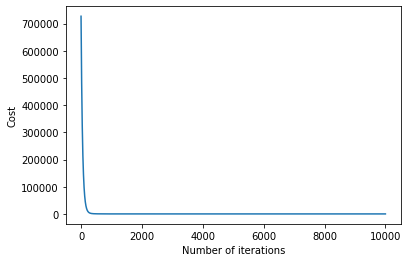

In [4]:
plt.plot(l)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()